In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):

    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_labels= []
        temp_images = []
        for row in csv_reader:
            
        # Makes first iteration of loop for first row do nothing.
        # skips the first row with headers.
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_array = np.array_split(image_data, 28) # Make 28 x 28
                temp_images.append(image_array)
                     
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float') 
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images =np.expand_dims(training_images,-1) 
testing_images = np.expand_dims(testing_images,-1) 

# Creates an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  rotation_range=30,
                                  shear_range=0.2,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255)
    

print(training_images.shape)
print(testing_images.shape)
    

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/857 [==============================] - 63s 74ms/step - loss: 2.4773 - accuracy: 0.2483 - val_loss: 1.5343 - val_accuracy: 0.4941
Epoch 2/15
858/857 [==============================] - 58s 68ms/step - loss: 1.4864 - accuracy: 0.5206 - val_loss: 0.9732 - val_accuracy: 0.6451
Epoch 3/15
858/857 [==============================] - 61s 71ms/step - loss: 1.1267 - accuracy: 0.6278 - val_loss: 0.7108 - val_accuracy: 0.7260
Epoch 4/15
858/857 [==============================] - 59s 69ms/step - loss: 0.9159 - accuracy: 0.6956 - val_loss: 0.5293 - val_accuracy: 0.7847
Epoch 5/15
858/857 [==============================] - 60s 69ms/step - loss: 0.7792 - accuracy: 0.7406 - val_loss: 0.6330 - val_accuracy: 0.7676
Epoch 6/15
858/857 [==============================] - 61s 71ms/step - loss: 0.6677 - accuracy: 0.7736 - val_loss: 0.4291 - val_accuracy: 0.8585
Epoch 7/15
858/857 [==============================] - 62s 72ms/step - loss: 0.5879 - accuracy: 0.8031 - val_loss: 0.3442 - val_accuracy:

[156.04715443668056, 0.74302846]

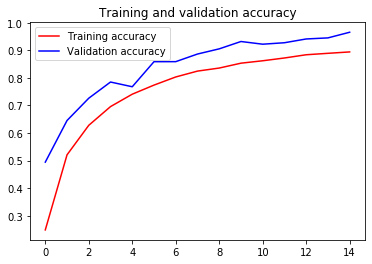

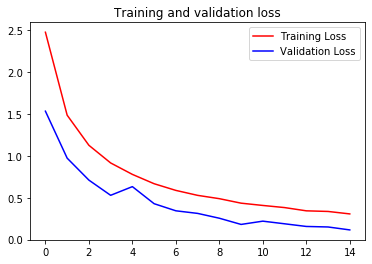

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()